# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng =city_weather ["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tual
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | sarina
Processing Record 5 of Set 1 | hadibu
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | kingston
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | batticaloa
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | dawei
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | brigantine
Processing Record 21 of Set 1 | afaahiti
Processing Record 22 of Set 1 | 

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [11]:
# Display sample data
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tual,-5.6667,132.7500,25.57,77,31,9.94,ID,1691455533
1,ushuaia,-54.8000,-68.3000,2.81,75,0,1.03,AR,1691455533
2,adamstown,-25.0660,-130.1015,20.88,76,72,3.54,PN,1691455533
3,sarina,-21.4333,149.2167,24.04,61,1,5.44,AU,1691455533
4,hadibu,12.6500,54.0333,25.58,80,41,9.97,YE,1691455534
...,...,...,...,...,...,...,...,...,...
575,dumai,1.6833,101.4500,25.74,92,67,0.96,ID,1691455668
576,jolo,6.0500,121.0167,28.79,72,18,2.01,PH,1691455668
577,changleng,28.7000,115.8167,30.97,72,61,2.53,CN,1691455668
578,pursat,12.3333,103.6667,28.15,67,100,1.62,KH,1691455669


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tual,-5.6667,132.7500,25.57,77,31,9.94,ID,1691455533
1,ushuaia,-54.8000,-68.3000,2.81,75,0,1.03,AR,1691455533
2,adamstown,-25.0660,-130.1015,20.88,76,72,3.54,PN,1691455533
3,sarina,-21.4333,149.2167,24.04,61,1,5.44,AU,1691455533
4,hadibu,12.6500,54.0333,25.58,80,41,9.97,YE,1691455534


In [14]:
len(city_data_df)

580

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

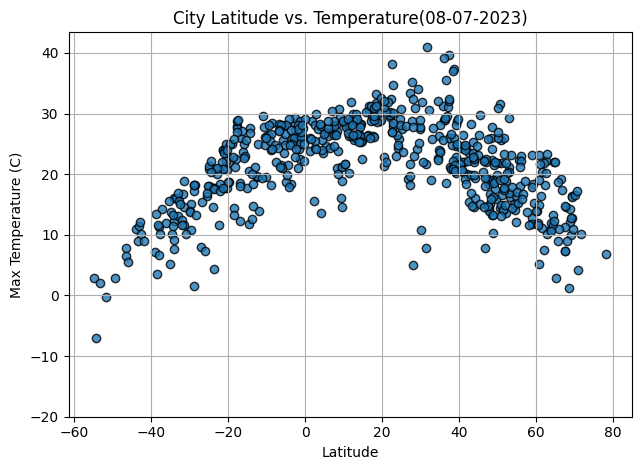

In [15]:
from datetime import datetime
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],alpha=.8 ,edgecolors="k")



# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.title(f"City Latitude vs. Temperature({date})")
plt.grid(True) 
plt.tight_layout()
# Set custom y-axis tick range
plt.yticks(range(-20, 41, 10))  # From -20 to 40 with an interval of 10

# Save the figure
# Save the figure
plt.savefig("../output_data/Fig1.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

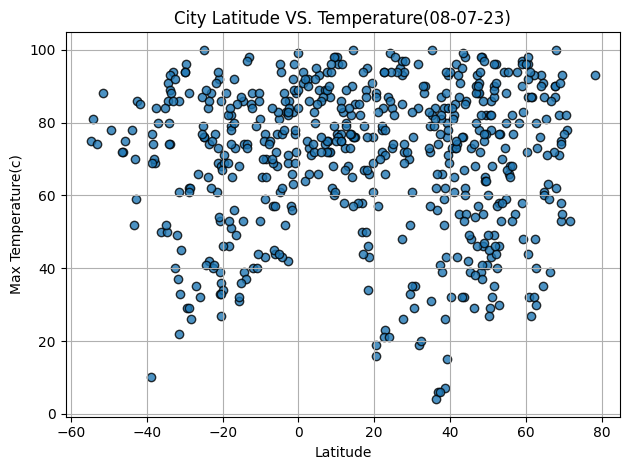

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],alpha= .8, edgecolors="k")
# Incorporate the other graph properties
# Formate date
date= datetime.now()
date= date.strftime("%m-%d-%y")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(c)")
plt.title (f"City Latitude VS. Temperature({date})")
plt.grid(True)
plt.tight_layout()



# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

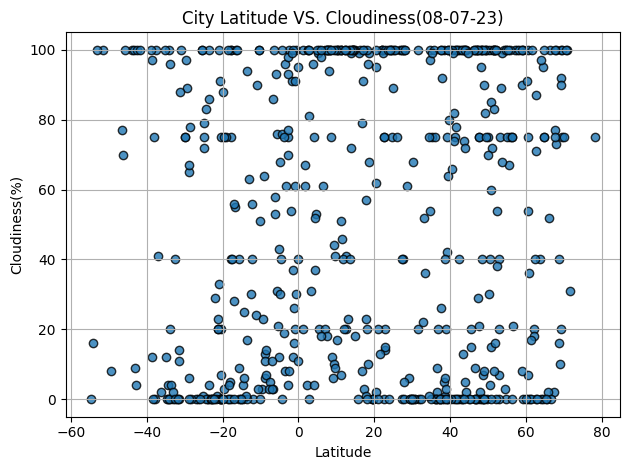

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],alpha=.8, edgecolor="k")
# Incorporate the other graph properties
#format date 
date= datetime.now()
date= date.strftime("%m-%d-%y")
plt.title (f"City Latitude VS. Cloudiness({date})")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()



# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

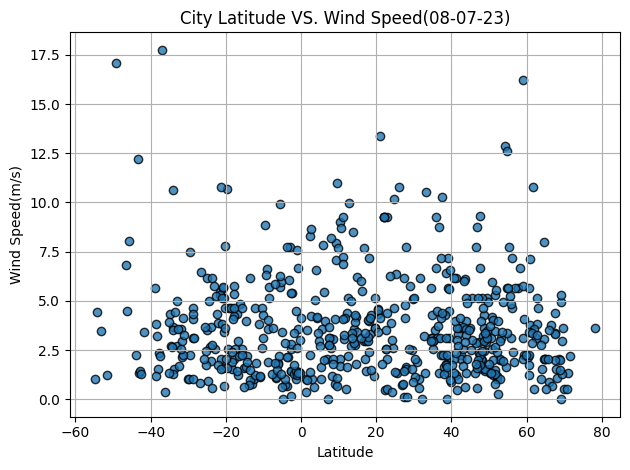

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],alpha=.8, edgecolor="k")


# Incorporate the other graph properties
date= datetime.now()
date= date.strftime("%m-%d-%y")
plt.title (f"City Latitude VS. Wind Speed({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= pd.DataFrame(city_data_df[city_data_df["Lat"] >= 0])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,hadibu,12.6500,54.0333,25.58,80,41,9.97,YE,1691455534
6,aasiaat,68.7098,-52.8699,1.24,82,16,2.04,GL,1691455535
7,hawaiian paradise park,19.5933,-154.9731,28.74,76,0,3.60,US,1691455535
9,kingston,17.9970,-76.7936,30.53,76,20,7.20,JM,1691455535
11,batticaloa,7.7102,81.6924,26.77,75,100,3.13,LK,1691455536


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= pd.DataFrame(city_data_df[city_data_df["Lat"]<=0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tual,-5.6667,132.7500,25.57,77,31,9.94,ID,1691455533
1,ushuaia,-54.8000,-68.3000,2.81,75,0,1.03,AR,1691455533
2,adamstown,-25.0660,-130.1015,20.88,76,72,3.54,PN,1691455533
3,sarina,-21.4333,149.2167,24.04,61,1,5.44,AU,1691455533
5,west island,-12.1568,96.8225,24.99,88,40,4.63,CC,1691455535


###  Temperature vs. Latitude Linear Regression Plot

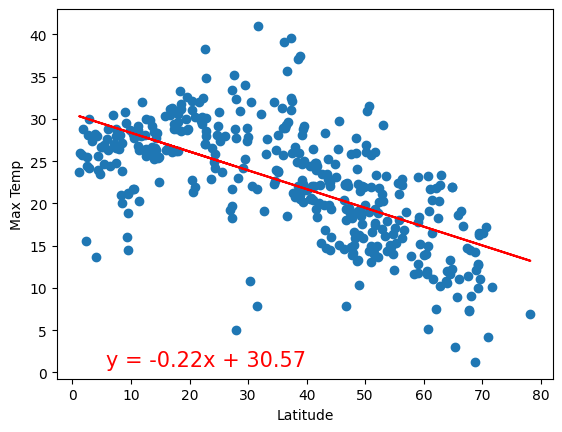

The r-value is:-0.6297414104209988


In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"The r-value is:{rvalue}")


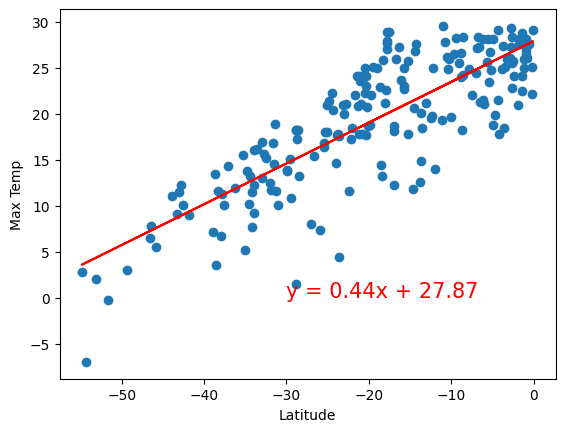

The r-value is:0.8197742407953204


In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"The r-value is:{rvalue}")

**Discussion about the linear relationship:** After reviewing the correlation coefficients (r-values) between latitude and maximum temperature for both hemispheres. For the Northern Hemisphere,a negative r-value suggests that as latitude increases, maximum temperature decreases.It explains why cities located at higher latitudes, are away from equator and closer to northpole,therefore they experience lower temperatures.For the Southern Hemisphere, the r-value is positive. So as the latitude increases, maximum temperature also increases.So as for cities farther away from the equator (increasing latitude), the maximum temperature tends to increase.

### Humidity vs. Latitude Linear Regression Plot

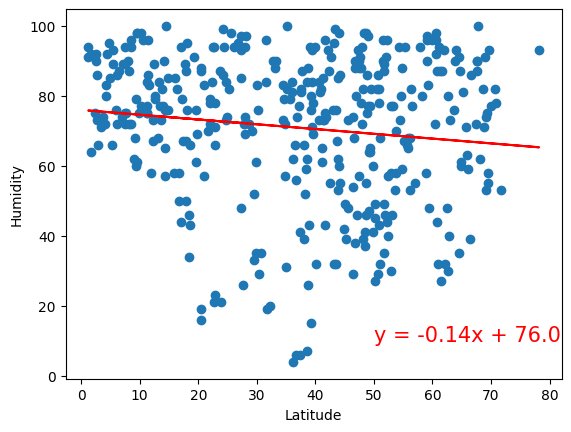

The r-value is:-0.1265828410091026


In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-value is:{rvalue}")

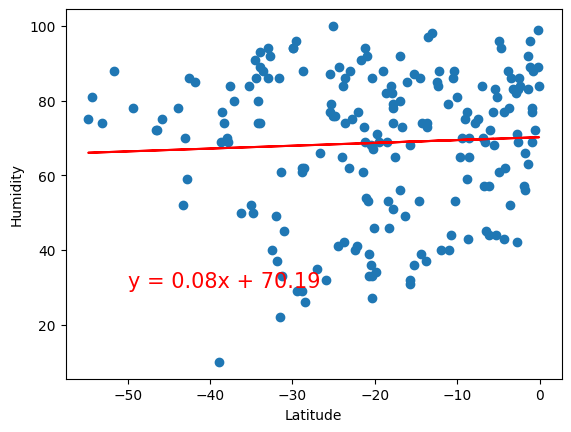

The r-value is:0.05213183717229141


In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-value is:{rvalue}")

**Discussion about the linear relationship:** A r-value of both Hemisphere is approximately close to zero for the latitude vs. humidity. It means there is a weak negative correlation between latitude and humidity in both Hemisphere. So it suggests a slight chance for humidity to decrease as latitude increases in both Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

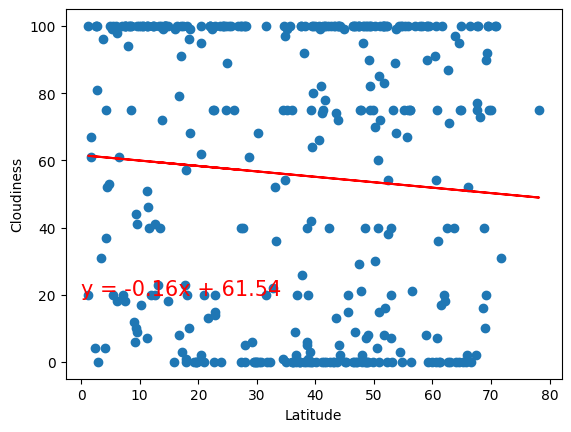

The r-value is:-0.07507788954680741


In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-value is:{rvalue}")

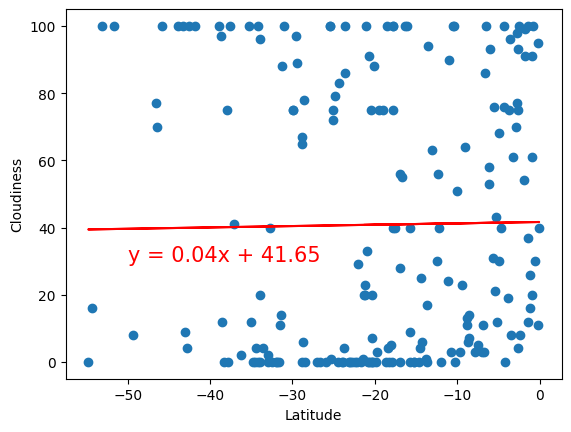

The r-value is:0.013582206320380411


In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-value is:{rvalue}")

**Discussion about the linear relationship:** A r-value of both Hemisphere is approximately close to zero for the latitude vs. cloudiness. In Northern Hemisphere there is a weak negative correlation. So there is a slight chance for cloudiness to decrease as latitude increases in both Hemisphere. A correlation value is zero in Southern Hemisphere that means there is no consistent pattern of change in one variable based on changes in the other variable.

### Wind Speed vs. Latitude Linear Regression Plot

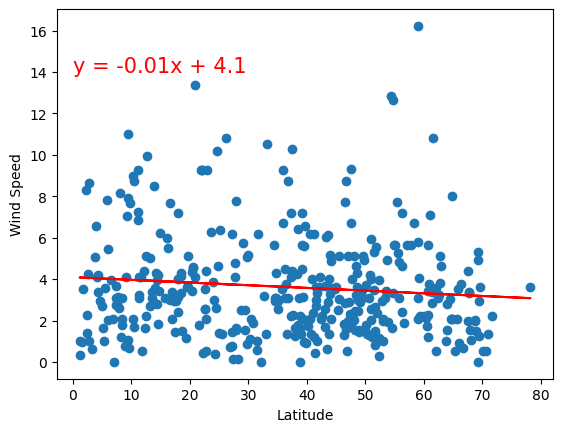

The r-value is:-0.10052347378708397


In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,14),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-value is:{rvalue}")

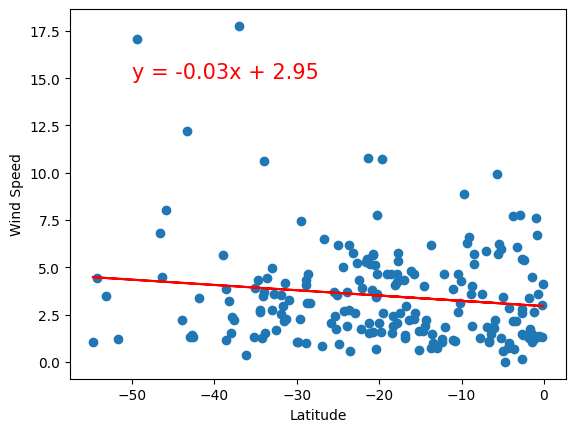

The r-value is:-0.14059856761938094


In [29]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-value is:{rvalue}")

**Discussion about the linear relationship:** For Wind Speed vs Latitude a correlation value of zero, means that there is no consistent pattern of change in one variable based on changes in the other variable.